# Tricking Stats

In [96]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
tricking = pd.read_csv('Tricking.csv')
tricking

,Date,Trick_Name,Attempts,Landed_Count,Surface
0,2025-09-25,Fulls,3,3,Spring Floor
1,2025-09-25,Full Hyperhook,7,7,Spring Floor
2,2025-09-25,Double Full,7,6,Spring Floor
3,2025-09-25,Corks,3,3,Spring Floor
4,2025-09-25,Cheat 1080,2,2,Spring Floor
...,...,...,...,...,...
209,2025-12-29,Cheat 1080,1,0,Spring Floor
210,2025-12-29,Backside 1260,5,2,Spring Floor
211,2025-12-29,Fulls,1,1,Spring Floor
212,2025-12-29,Full Hyperhook,1,1,Spring Floor


In [98]:
# List of tricks
sorted(tricking['Trick_Name'].unique())

['B-Twist',
 'B-Twist (Shuriken)',
 'B-Twist Hyperhook',
 'Back Handspring',
 'Backside 1260',
 'Boxcutter',
 'Cheat 1080',
 'Cheat 1260',
 'Cheat 900',
 'Corks',
 'Corks (Round)',
 'Double B-Twist',
 'Double Cork',
 'Double Full',
 'Double Full Hyperhook',
 'Front Tuck',
 'Full Hyperhook',
 'Full Hyperhook (Shuriken)',
 'Full Snapu',
 'Fulls',
 'Gainer',
 'Gainer (Switch)',
 'Gainers',
 'Round Off Backflip',
 'Round Off Backflip (Multiple Kicks)',
 'Side Swipe',
 'Triple Full',
 'Wrap Full',
 'Wrap Full Hyperhook']

In [99]:
tricking['Date'] = pd.to_datetime(tricking['Date'])
tricking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          214 non-null    datetime64[ns]
 1   Trick_Name    214 non-null    object        
 2   Attempts      214 non-null    int64         
 3   Landed_Count  214 non-null    int64         
 4   Surface       214 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 8.5+ KB


### Tricks I've done most often

In [100]:
tricking['Trick_Name'].value_counts().head() # Value

Trick_Name
Full Hyperhook    23
Corks             23
Fulls             20
Cheat 1080        17
Double Full       15
Name: count, dtype: int64

In [101]:
tricking['Trick_Name'].value_counts(normalize = True).head() # Percentage

Trick_Name
Full Hyperhook    0.107477
Corks             0.107477
Fulls             0.093458
Cheat 1080        0.079439
Double Full       0.070093
Name: proportion, dtype: float64

### Show tricks that I didn't land 100% of the time

In [102]:
nlanded100 = tricking['Attempts'] != tricking['Landed_Count']
tricking[nlanded100].head()

,Date,Trick_Name,Attempts,Landed_Count,Surface
2,2025-09-25,Double Full,7,6,Spring Floor
7,2025-09-28,Double B-Twist,3,0,Spring Floor
11,2025-10-05,Corks (Round),7,5,Spring Floor
12,2025-10-05,Cheat 1080,5,3,Spring Floor
22,2025-10-08,Round Off Backflip (Multiple Kicks),3,2,Puzzle Mats


## Trick Analysis
Function to aggregate chosen trick by months and calculate the successrates by month

In [103]:
# trick_name (string): name of the trick that I wish to analyze 
def trick_analysis(trick_name):
    # Filter for specific trick
    trick = tricking[tricking["Trick_Name"] == trick_name]

    # Aggregate by month
    trick_monthly = trick.groupby(pd.Grouper(key='Date', freq='ME'))[
    ['Attempts', 'Landed_Count']
        ].sum().reset_index()
    trick_monthly['Date'] = trick_monthly['Date'].dt.strftime('%b %Y')
    trick_monthly["Success_Rate"] = trick_monthly["Landed_Count"] / trick_monthly["Attempts"]
    trick_monthly["rolling_avg"] = trick_monthly["Success_Rate"].rolling(3).mean()
    trick_monthly["var"] = trick_monthly["Success_Rate"].rolling(3).std()
    trick_monthly["Trick_Name"] = trick_name
    
    return trick_monthly

In [104]:
test = trick_analysis("Corks")
test

,Date,Attempts,Landed_Count,Success_Rate,rolling_avg,var,Trick_Name
0,Sep 2025,11,11,1.000000,NaN,NaN,Corks
1,Oct 2025,7,6,0.857143,NaN,NaN,Corks
2,Nov 2025,29,29,1.000000,0.952381,0.082479,Corks
3,Dec 2025,39,38,0.974359,0.943834,0.076163,Corks


In [105]:
# agg_data (df): Data frame with the data that has been aggregated by month (output of trick_analysis())
def trick_visual(agg_data):
    plt.figure()
    plt.plot(agg_data["Date"], agg_data["Success_Rate"], marker="o")
    plt.xlabel("Date")
    plt.ylabel("Success Rate")
    plt.title(agg_data["Trick_Name"][0] + " Success Rate Over Time")
    plt.ylim(-0.05, 1.05)
    return plt.show()

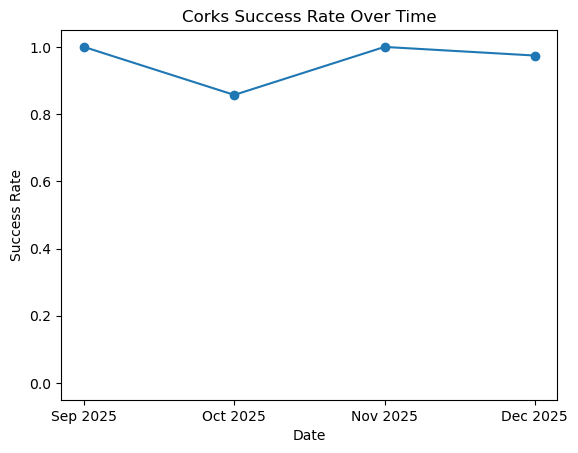

In [106]:
trick_visual(test)

## Cheat 1080 Analysis
As I prepare for upcoming tournaments, the cheaet 1080 is a key factor in my success at competition 

In [107]:
# Filter data for cheat 1080
cheat1080 = tricking[tricking["Trick_Name"] == "Cheat 1080"]
cheat1080

# Filter Months with < 2 days
# !!!

,Date,Trick_Name,Attempts,Landed_Count,Surface
4,2025-09-25,Cheat 1080,2,2,Spring Floor
12,2025-10-05,Cheat 1080,5,3,Spring Floor
19,2025-10-08,Cheat 1080,3,3,Puzzle Mats
47,2025-10-19,Cheat 1080,2,1,Spring Floor
69,2025-10-29,Cheat 1080,3,3,Puzzle Mats
77,2025-11-02,Cheat 1080,4,4,Spring Floor
93,2025-11-16,Cheat 1080,2,0,Spring Floor
104,2025-11-20,Cheat 1080,4,4,Spring Floor
118,2025-11-23,Cheat 1080,2,0,Spring Floor
125,2025-11-25,Cheat 1080,3,2,Spring Floor


##### Aggregate by month to reduce day to day variability and stabilize estimates

In [108]:
cheat1080_monthly = cheat1080.groupby(pd.Grouper(key='Date', freq='ME'))[
    ['Attempts', 'Landed_Count']
].sum().reset_index()
cheat1080_monthly['Date'] = cheat1080_monthly['Date'].dt.strftime('%b %Y')
cheat1080_monthly["Success_Rate"] = cheat1080_monthly["Landed_Count"] / cheat1080_monthly["Attempts"]
cheat1080_monthly["Trick_Name"] = "Cheat 1080"
cheat1080_monthly

,Date,Attempts,Landed_Count,Success_Rate,Trick_Name
0,Sep 2025,2,2,1.000000,Cheat 1080
1,Oct 2025,13,10,0.769231,Cheat 1080
2,Nov 2025,19,11,0.578947,Cheat 1080
3,Dec 2025,8,2,0.250000,Cheat 1080


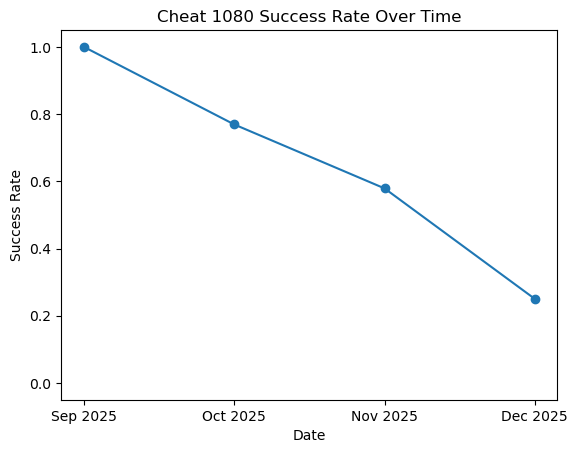

In [109]:
# plot
plt.figure()
plt.plot(cheat1080_monthly["Date"], cheat1080_monthly["Success_Rate"], marker="o")
plt.xlabel("Date")
plt.ylabel("Success Rate")
plt.title("Cheat 1080 Success Rate Over Time")
plt.ylim(-0.05, 1.05)
plt.show()